### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings 
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df=pd.read_csv('hotel_bookings.csv')

### EDA

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Statistical overview of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


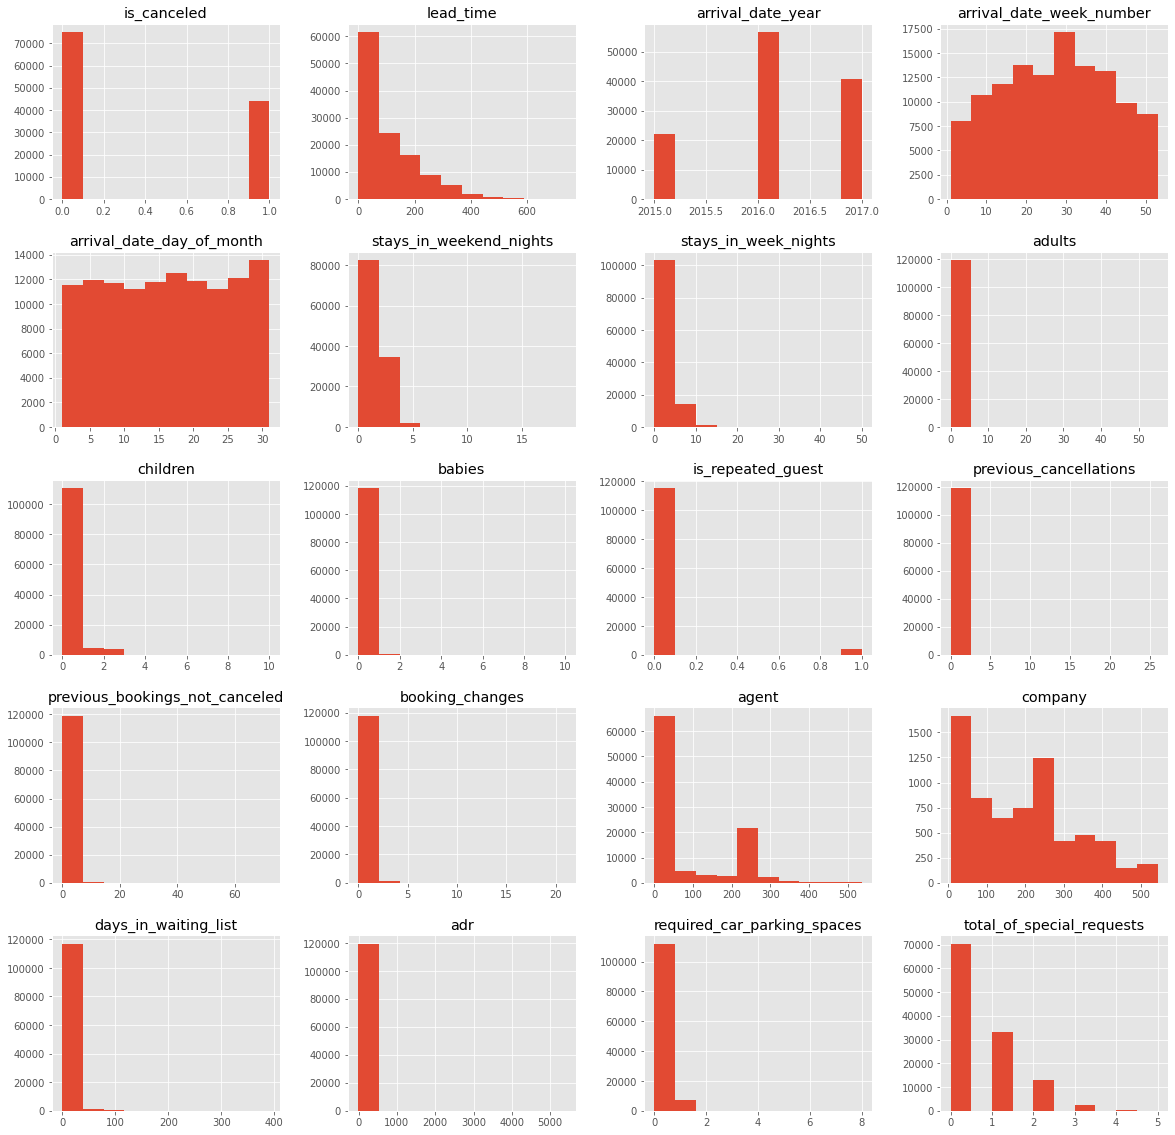

In [8]:
df.hist()
his=plt.gcf()
his.set_size_inches(20,20)
plt.show()

#### Checking for null values

In [9]:
# We can see some null values here
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [11]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [12]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

#### Null values imputation

In [13]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['company']=df['company'].fillna(df['company'].mean())
df['agent']=df['agent'].fillna(df['agent'].mean())
df['children']=df['children'].fillna(df['children'].mean())

In [14]:
# You can see there are no null values after imputation
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [17]:
# Dropping unnecessary columns
df.drop(['arrival_date_year','arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month','reservation_status_date','previous_bookings_not_canceled'],axis=1,inplace=True)

In [18]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,3,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,4,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   stays_in_weekend_nights      119390 non-null  int64  
 4   stays_in_week_nights         119390 non-null  int64  
 5   adults                       119390 non-null  int64  
 6   children                     119390 non-null  float64
 7   babies                       119390 non-null  int64  
 8   meal                         119390 non-null  object 
 9   country                      119390 non-null  object 
 10  market_segment               119390 non-null  object 
 11  distribution_channel         119390 non-null  object 
 12  is_repeated_guest            119390 non-null  int64  
 13 

### Label Encoding for categorical variables

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['hotel']=le.fit_transform(df['hotel'])
df['country']=le.fit_transform(df['country'])
df['market_segment']=le.fit_transform(df['market_segment'])
df['distribution_channel']=le.fit_transform(df['distribution_channel'])
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])
df['deposit_type']=le.fit_transform(df['deposit_type'])
df['customer_type']=le.fit_transform(df['customer_type'])
df['reservation_status']=le.fit_transform(df['reservation_status'])
df['meal']=le.fit_transform(df['meal'])


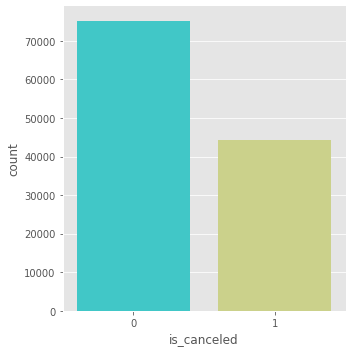

In [21]:
sns.catplot(x='is_canceled',data=df,kind='count',palette='rainbow')
# We can see well balanced dataset here

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  int32  
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   stays_in_weekend_nights      119390 non-null  int64  
 4   stays_in_week_nights         119390 non-null  int64  
 5   adults                       119390 non-null  int64  
 6   children                     119390 non-null  float64
 7   babies                       119390 non-null  int64  
 8   meal                         119390 non-null  int32  
 9   country                      119390 non-null  int32  
 10  market_segment               119390 non-null  int32  
 11  distribution_channel         119390 non-null  int32  
 12  is_repeated_guest            119390 non-null  int64  
 13 

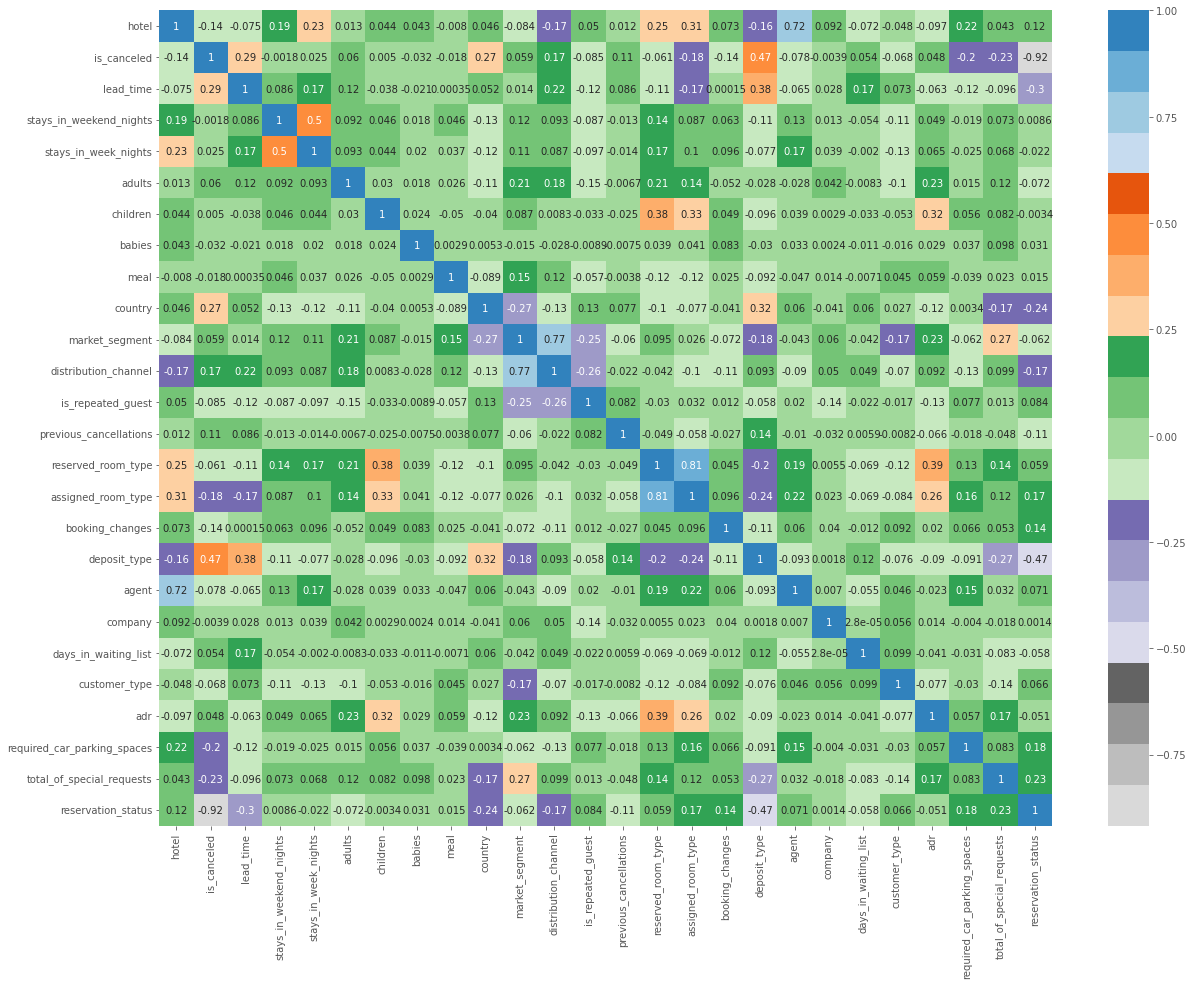

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='tab20c_r')
plt.show()

### Separating dependant and independant variables

In [24]:
X=df.drop('is_canceled',axis=1)
y=df.is_canceled

### Train-Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Trying several machine learning algorithms

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

In [28]:
# We are going to try 4 algorithms on the dataset 
# Going to ignore algorithms like KNN and SVM because they are not suitable for large datasets
alg=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]
names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifer']

In [29]:
l1=[]
l2=[]
for i in alg:
    model=i
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_hat)
    f1=f1_score(y_test,y_hat)
    l1.append(accuracy)
    l2.append(f1)

[19:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
eval=pd.DataFrame({'Model':names,
                  'Accuracy':l1,'F1-score':l2})

In [31]:
eval
# We can see that decision tree classification,random forest classification and XGboost classification are giving 100% accuracy
# We can not use decisiontree without boosting or bagging techniques
# So we are going to use either Randomfrest classifier or XGboost classifier


,Model,Accuracy,F1-score
0,LogisticRegression,0.990033,0.986563
1,DecisionTreeClassifier,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000
3,XGBClassifer,1.000000,1.000000


#### We are going to use Random Forest Classifier for our project which is bagging technique

### Random Forest Classifier

In [32]:
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat1=rc.predict(X_test)
print("Training accuracy:",rc.score(X_train,y_train))
print("Testing accuracy:",rc.score(X_test,y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


<AxesSubplot:>

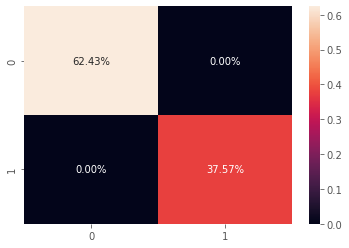

In [33]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,y_hat1)
sns.heatmap(a/np.sum(a),annot=True,fmt='.2%')